<a href="https://colab.research.google.com/github/sasi-kalluri/oasis/blob/main/un_employement_status_in_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path = '/content/Unemployment in India.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Print the first few rows to verify data is loaded correctly
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
# Handling missing data by filling missing values (forward fill method)
df.ffill(inplace=True)  # Forward fill replaces missing values with the last known value

# Check for any remaining missing values
print(df.isnull().sum())


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [ ]:
# Clean up the column names (in case they have extra spaces)
df.columns = df.columns.str.strip()

# If there is a 'Date' column, convert it to a date format for better handling of time
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Convert 'Date' to a proper date format with day-first parsing

# Print column names to verify
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


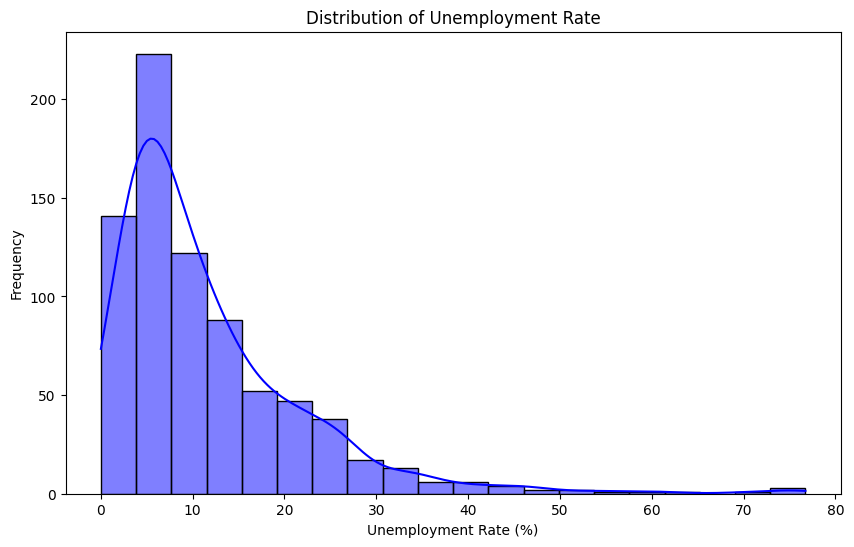

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram to see the distribution of unemployment rates
plt.figure(figsize=(10, 6))  # Set the size of the plot
# Using the correct column name 'Estimated Unemployment Rate (%)'
sns.histplot(df['Estimated Unemployment Rate (%)'], kde=True, color='blue', bins=20)  # kde=True adds a smooth line
plt.title('Distribution of Unemployment Rate')  # Title for the plot
plt.xlabel('Unemployment Rate (%)')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()  # Show the plot


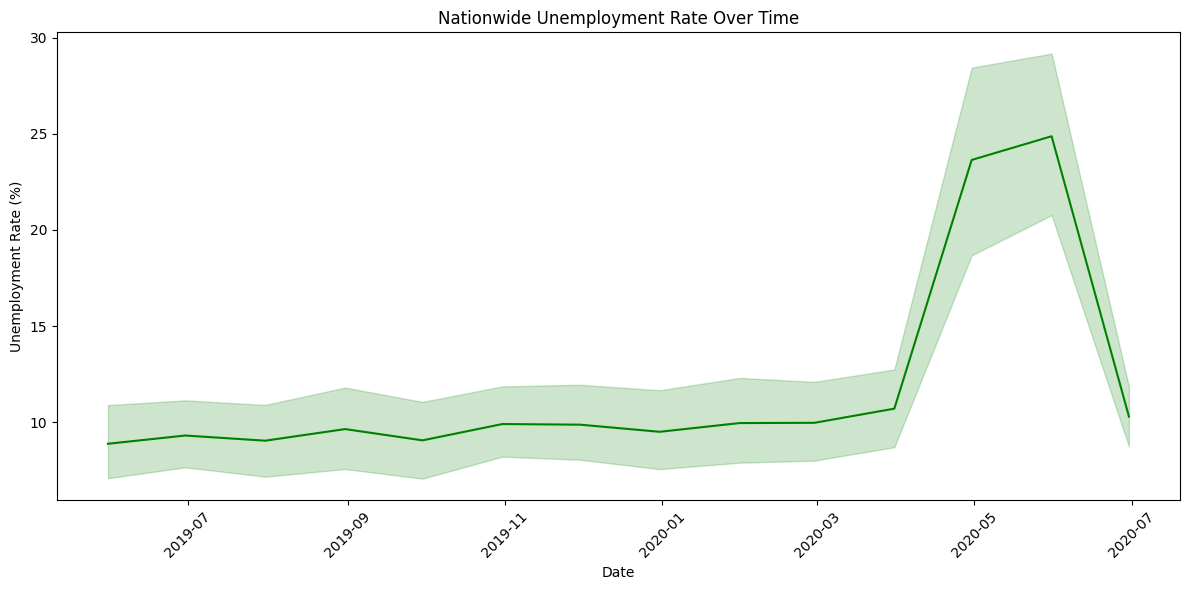

In [ ]:
# Plot the unemployment rate over time (only if 'Date' and 'Estimated Unemployment Rate (%)' columns are present)
if 'Date' in df.columns and 'Estimated Unemployment Rate (%)' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', color='green')  # Line plot of unemployment over time
    plt.title('Nationwide Unemployment Rate Over Time')  # Adding a title
    plt.xlabel('Date')  # Label for x-axis
    plt.ylabel('Unemployment Rate (%)')  # Label for y-axis
    plt.xticks(rotation=45)  # Rotate the date labels for better readability
    plt.tight_layout()  # Adjust the layout to make sure everything fits
    plt.show()  # Show the plot


Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)'],
      dtype='object')


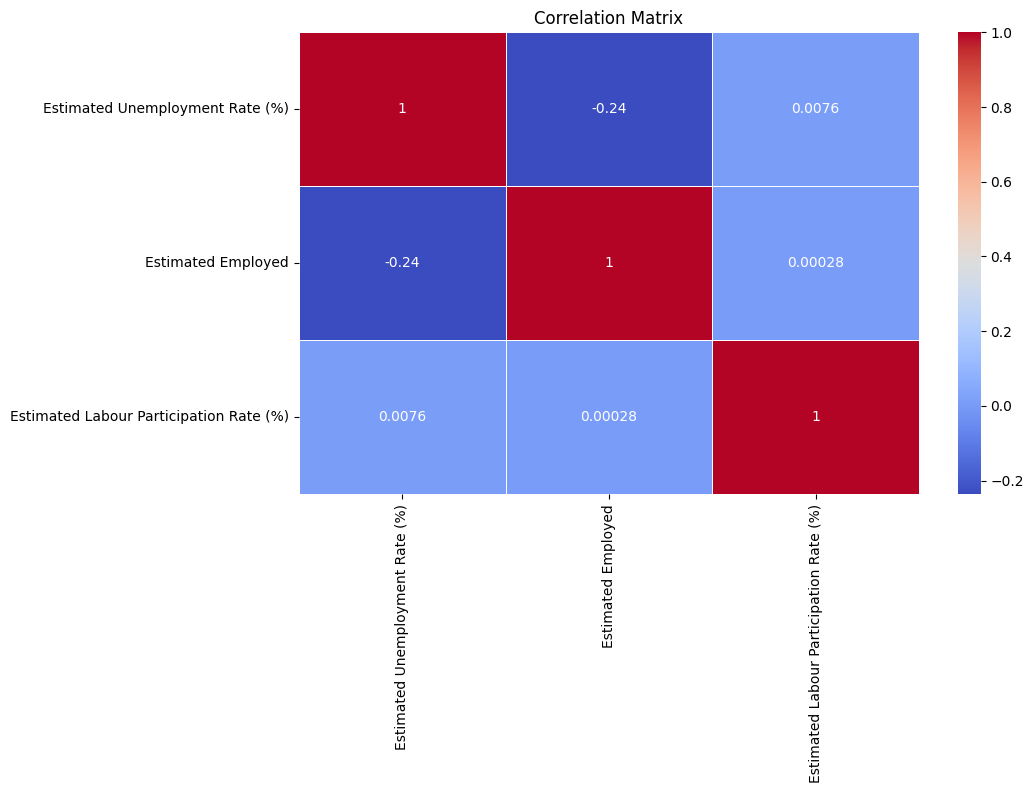

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Print the numeric columns to verify
print(numeric_df.columns)

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Show correlations between variables
plt.title('Correlation Matrix')  # Add a title to the plot
plt.show()  # Display the plot


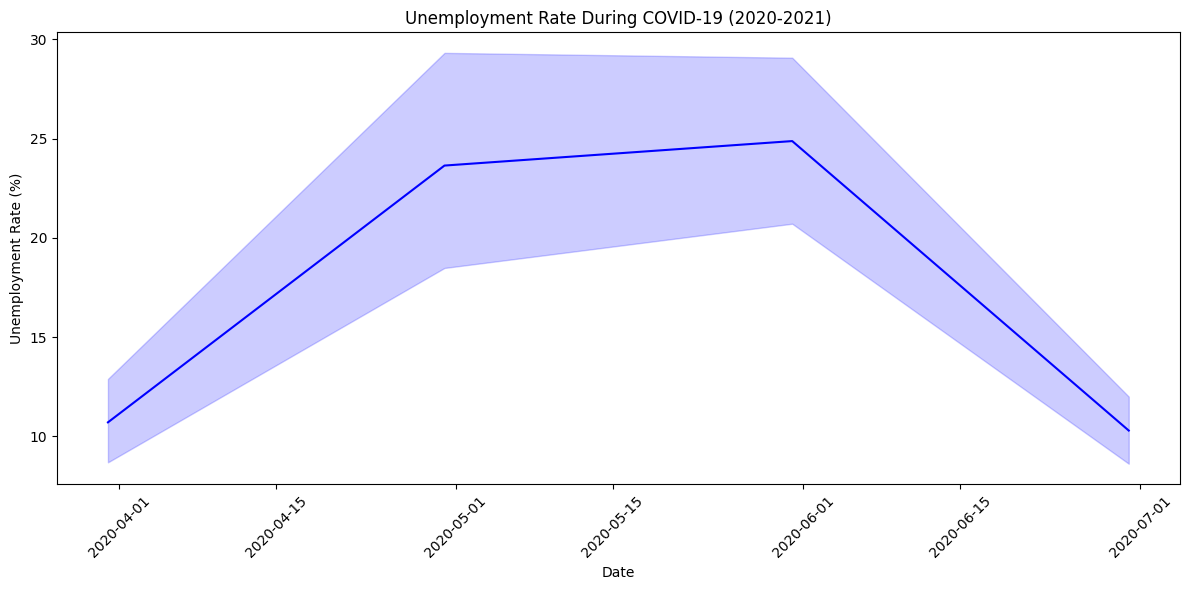

In [ ]:
# Filter and analyze unemployment during COVID-19 (2020-2021)
if 'Date' in df.columns and 'Estimated Unemployment Rate (%)' in df.columns:
    covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-12-31')]  # Filter for COVID period
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=covid_period, x='Date', y='Estimated Unemployment Rate (%)', color='blue')  # Line plot for COVID period
    plt.title('Unemployment Rate During COVID-19 (2020-2021)')  # Title for the plot
    plt.xlabel('Date')  # x-axis label
    plt.ylabel('Unemployment Rate (%)')  # y-axis label
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Adjust the layout to fit everything properly
    plt.show()  # Show the plot
